In [1]:
import os
import re
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import shutil
from collections import OrderedDict

In [119]:
"""Get the width and height of the terminal window.
"""

width, height = shutil.get_terminal_size((80, 20))

"""
    :param work_dir (str) : Current working directory
    :param main_dir (str) : Always be set to ./SuperBone_ver1
    :param output_dir (str) : The default directory where all outputs are stored
"""  

work_dir = os.getcwd()
main_dir = work_dir
initial_dir = os.path.join(work_dir,'ss_txt') 
output_dir = os.path.join(work_dir,'analyze_figure')

import FileChooser

"""Initialize the class and set the initial directory, file type, and the type of file/folder to choose

    :param initial_dir (str) : Initial directory to open the file dialog
    :param file_type (str) : The type of file to select (e.g. "Image", "DICOM",...)
    :param choose_type (str) : The type of file/folder to select ("File", "Folder", "Multiple Files")
"""  

selector = FileChooser.Selector(initial_dir, file_type = "SS_TXT", choose_type = "Folder")

"""Open a file dialog windows and return the source path

    :param file_src_path (str) : The absolute path of the source image
"""

dir_src_path = selector.run()

Import Folder : /home/marshall323/桌面/National_Defense/0301/ss_txt


Ceramics : 370 GPa
Aluminum Alloy : 69 GPa
Steel : 200 GPa
Lead : 16 GPa


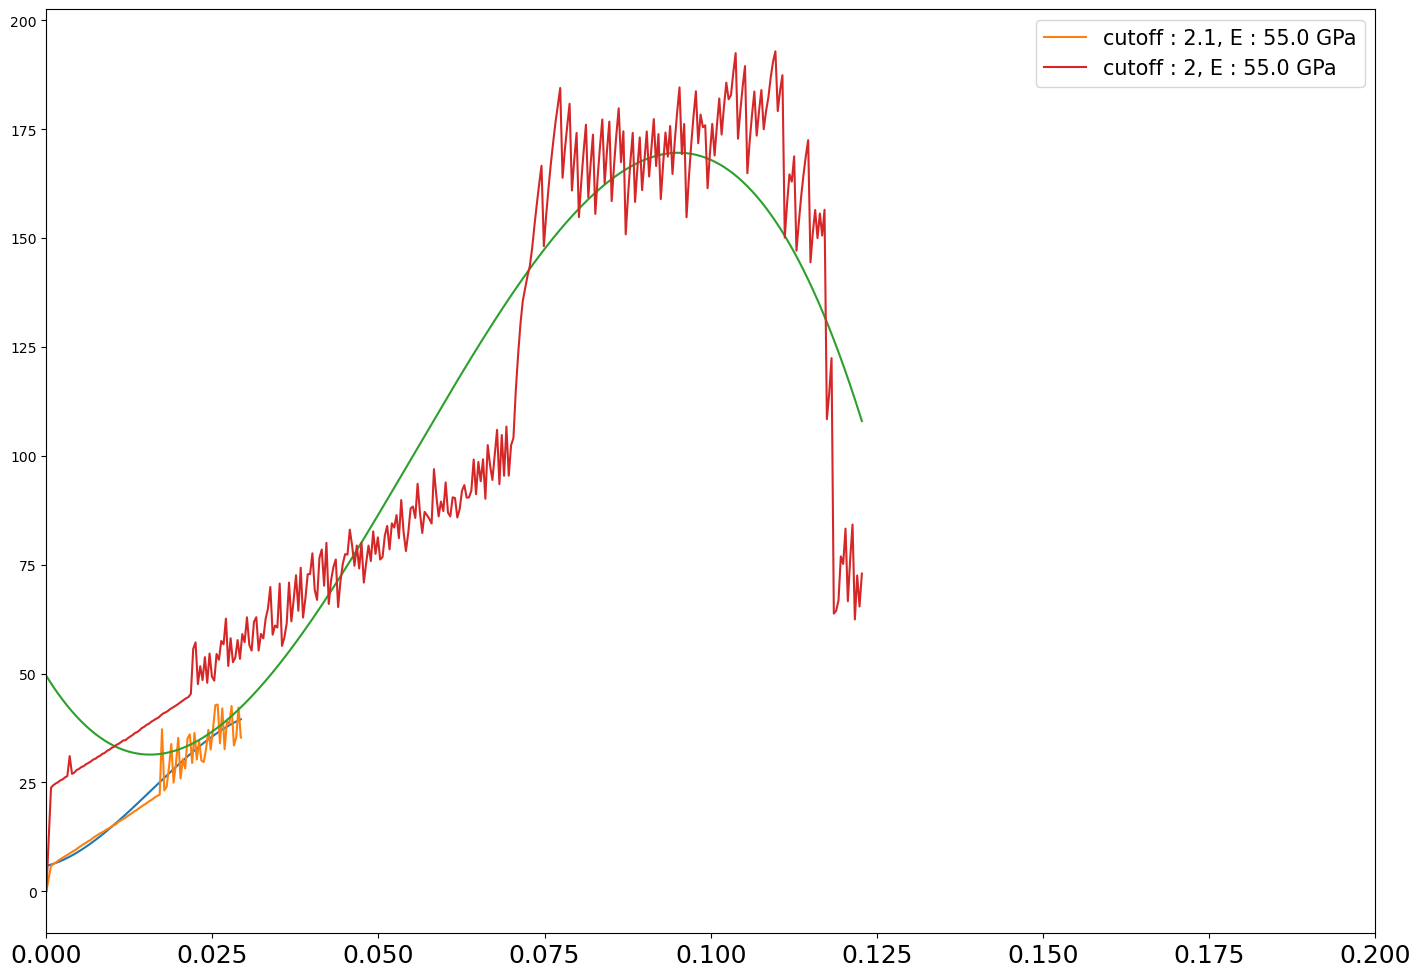

In [133]:
from scipy import optimize as op

regex = re.compile(r'ss_rigid_(.+)')

ss_files = [os.path.join(dir_src_path, file) for file in os.listdir(dir_src_path) 
           if file.endswith('.txt')]

ss_files = sorted(ss_files)

fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*2.5)

material = ['Steel', 'Aluminum Alloy', 'Ceramics', 'Lead']
module = ['200', '69', '370', '16']

for i, ss_file in enumerate(ss_files):
    df = pd.read_csv(ss_file, sep='\s+')
    df = df[pd.to_numeric(df['exx'], errors='coerce').notnull()]
    exx = np.array(df['exx'], dtype='float32')
    sxx = np.array(df['sxx'], dtype='float32')
    exx[0] = 0
    sxx[0] = 0
    
    '''
    strain = np.max(exx)*0.08
    print(strain)
    strain = exx.flat[np.abs(exx - strain).argmin()]
    stress = sxx[np.where(exx==strain)]
    E = (stress-sxx[0])/((strain-exx[0])*100)
    '''
    epsilon = regex.search(Path(ss_file).stem).group(1)
    # cutoff = regex.search(Path(ss_file).stem).group(2)
    def f_3(x, A, B, C, D):
        return A * x* x* x + B * x* x + C *x +D

    popt, _ = op.curve_fit(f_3, exx, sxx)
    y1 = [f_3(i, popt[0], popt[1], popt[2], popt[3]) for i in exx]
    plt.plot(exx, y1)
    
    # label = "{}, epsilon : {}, E : {} GPa ({})".format(material[i], epsilon, round(float(A/100),2), module[i])
    label = "cutoff : {}, E : {} GPa".format(epsilon, round(A/100,2))
    ax.plot(exx,sxx, label=label)
    
    x = np.arange(0, 0.05, 0.01)
    y = A * x + B
    # print(A/100)
    # plt.plot(x, y)
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='best', fontsize=15)


plt.xticks(fontsize=18) 
plt.xlim(0, 0.2)
'''
plt.xlabel('Strain',fontsize=22,labelpad=10)
plt.yticks(fontsize=18) 
plt.ylim(0, 300)
plt.ylabel('Stress(MPa)',fontsize=22,labelpad=10)
'''
print('Ceramics : {} GPa'.format(370))
print('Aluminum Alloy : {} GPa'.format(69))
print('Steel : {} GPa'.format(200))
print('Lead : {} GPa'.format(16))

save_path = os.path.join(initial_dir,'curve.png')
#plt.savefig(save_path, bbox_inches='tight',facecolor = 'white', dpi=100)